Silent substitution with STLAB
==============================

In [14]:
import sys
from random import randrange

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyplr.calibrate import CalibrationContext


Set up calibration context
--------------------------

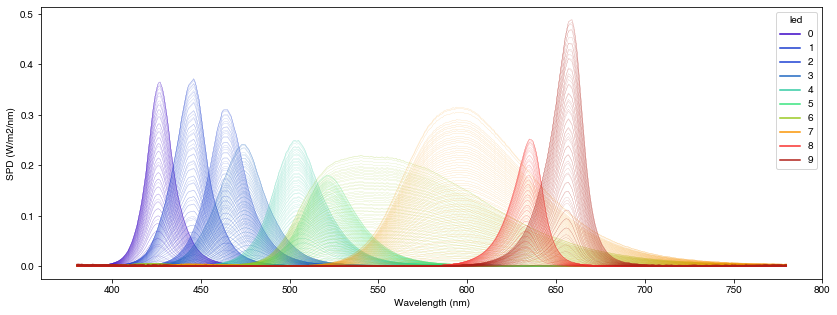

In [8]:
cc = CalibrationContext(data='../data/S1_corrected_oo_spectra.csv', binwidth=1)
fig = cc.plot_calibrated_spectra()

Choose random device settings
-----------------------------

In [26]:
settings = [randrange(0,4096) for led in range(10)]
settings

[2699, 3026, 2659, 1060, 2916, 1395, 3393, 2920, 2213, 3282]

Predict spectral power distribution
-----------------------------------

In [48]:
spd = cc.predict_spd(settings)
spd

,380,381,382,383,384,385,386,387,388,389,...,771,772,773,774,775,776,777,778,779,780
0,0.020057,0.020765,0.019329,0.020097,0.017607,0.017189,0.018586,0.016594,0.017508,0.019698,...,0.015878,0.016909,0.016701,0.01574,0.016668,0.01648,0.015568,0.013906,0.015757,0.016677


Predict spectral *a*-opic irradiances
-------------------------------------

In [47]:
ao = cc.predict_aopic(settings)
ao

,S,M,L,Rods,Mel
0,16.854672,31.889356,39.335863,29.062091,25.836366


Useful functions
----------------

In [49]:
def smlri_calculator(x, d):
    """
    x is 20 values, between 0 and 1
    Takes 20 values, corresponding to the values for the primaries in two scenarios. Scenario 1: low-mel, scenario: high-mel.
    x[0:9] -> low-mel
    x[10:19] -> high-mel
    """
    settings1 = x[0:9]
    settings2 = x[10:19]
    smlr1 = 0
    smlr2 = 0
    for ii in range(0, 9):
        idx1 = int(np.round(settings1[ii] * 4095))
        idx2 = int(np.round(settings2[ii] * 4095))
        smlr1 = smlr1 + d.loc[(ii, idx1)]
        smlr2 = smlr2 + d.loc[(ii, idx2)]
    return smlr1, smlr2

def melanopsin_contrast_calculator(x, d):
    smlr1, smlr2 = smlri_calculator(x, d)
    contrast = 1-pow((smlr2.Mel-smlr1.Mel)/smlr1.Mel, 2)
    return contrast

def cone_contrast_calculator(x, d):
    smlr1, smlr2 = smlri_calculator(x, d)
    contrast = np.array([(smlr2.S-smlr1.S)/smlr1.S, 
                         (smlr2.M-smlr1.M)/smlr1.M, 
                         (smlr2.L-smlr1.L)/smlr1.L])
    return contrast